In [6]:
using PyPlot
using Parameters

In [9]:
include("TDFunctions.jl")
include("EntrainmentDefs.jl")

calc_DFR (generic function with 2 methods)

In [12]:
@with_kw mutable struct dycoms_params
    SST0::Real = 292.5; # (K)
    dSST::Real = 0.0; # (K/day)
    
    D::Real = 3.75e-6; # (1/s)
    DFR::Real = 48.0; # (W/m^2)
    
    CTh::Real = 0.0008; #0.000945;
    CTq::Real = 0.0008; #0.0013;
    V::Real = 5.25; # (m/s)
    
    SHF::Real = 5.0; # (W/m^2) 16
    LHF::Real = 55.0; # (W/m^2) 93
    
    RHsurf::Real = 0.70;
    RHft::Real = 0.25;
    
    Gamma_q::Real = -2e-6; # (kg/kg/m)
    sft0::Real = 296; #294.75; # (K)
    Gamma_s::Real = 5e-3; # (K/m)
    qft0::Real = calc_qft0(RHft, Gamma_q, sft0, Gamma_s); # (kg/kg)
    
    A::Real = 2.0;
    a::Real = 0.8;
    
    etype::ent_type = enBal();
    rtype::rad_type = direct();
    ftype::flux_type = varFlux();
end

function calc_qft0(RHft, Gamma_q, sft0, Gamma_s)
    # calculate qft0
    zft = 900.0;
    qft(x) = x + Gamma_q * zft;
    hft(x) = Cp * (sft0 + Gamma_s * zft) + L0 * qft(x);
    Tft(x) = temp(zft, hft(x), qft(x));
    f(x) = x .- q_sat(zft, Tft(x)) .* RHft;
    qft0 = find_zero(f, (0.0,0.1), Bisection());
    qft0 = qft0 - Gamma_q * zft;
    return qft0
end

calc_qft0 (generic function with 1 method)

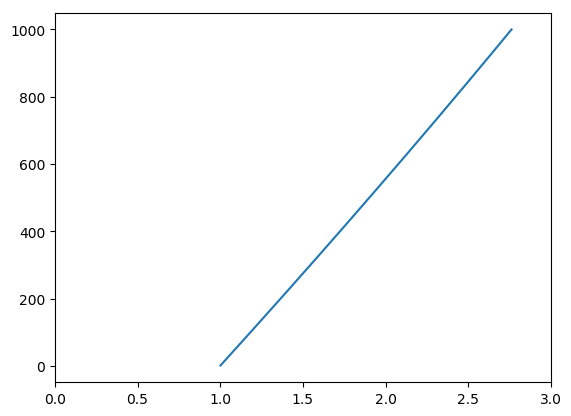

catch LCL
zb	0.0

In [13]:
h = 305e3; qt = 9e-3;
z = collect(1:1:1000)
T = temp.(z,h,qt)
ql = q_l.(z,T,qt)
zi = 200.0;
zb = LCL(zi,h,qt)
print("zb","\t",zb)
plot(ql*1000.0,z)
xlim([0,3])
show()

In [14]:
h = 305e3; qt = 8e-3;
z = 600.0;

T = temp.(z,h,qt)
p = pres(z,T)
qs = q_sat(z,T)
qv = q_v(z,T,qt)
ql = q_l(z,T,qt)

println(T)
println(p)
println(qs)
println(qv)
println(ql)
println(qt-qv-ql)
println(q_sat(z,280))

280.6915159573675
94615.67443165286
0.006922287191521217
0.006922287191521217
0.0010777128084787828
0.0
0.006597531480600392


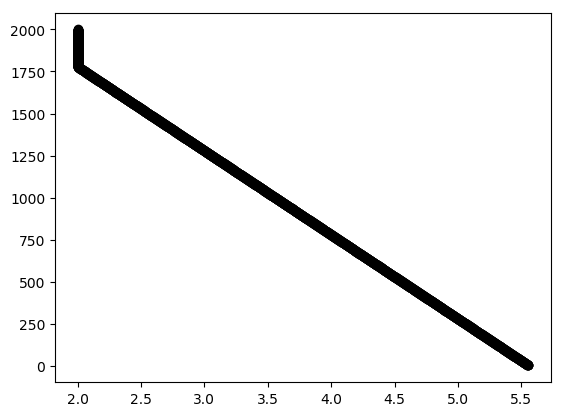

In [16]:
z = collect(1:1:2000);
p = dycoms_params();
qft = q_ft(z,p)*1000.0;
plot(qft,z,"ko-")
show()